<a href="https://colab.research.google.com/github/OSEUK/Tutorial/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 예제는 인공지능 강의 3주차 기계학습(1) 방법론의 PPT를 참조해서 하나하나 따라가면서 해보길 바래요.


여기서 하는 일은 nbastat2022.csv 파일을 읽어들이고, 이 파일에서 FGA로부터 FGM을 예측하는 간단한 회귀 모델을 구현하는 거에요.

굿럭!!

## 1. library import

파이썬에서 사용하는 중요 라이브러리인 numpy와 pandas 및 colab에서 사용하는 drive를 import해요

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2. mount drive

google drive에서 사용할 folder를 mount해요

## 3. upload file

개인 PC에 저장된 데이터 파일을 google drive에 upload해요.
개인 PC에 nbastat2022.csv가 저장되어 있어야해요.

## 4. read csv file

pandas의 read_csv 파일을 이용해서 nbastat2022.csv 파일에 저장된 정보를 dataframe으로 읽어들여요. 읽어들인 dataframe의 이름을 nbastat이라고 한다면, nbastat을 출력해보아요.

In [ ]:
nbastat = pd.read_csv("/content/drive/MyDrive/nbastat2022.csv",sep = ',', encoding = 'UTF-8')
nbastat

## 5. line 수 count

nbastat의 줄 수를 세서 그 값을 m (data의 갯수)으로 저장해요. m을 출력해보아요.

In [ ]:
m = len(nbastat)
m

## 6. nbastat에서 colulm 선택

nbastat의 여러 속성 (column)들 중에서 우리가 사용할 2개의 속성인 FGA와 FGM을 선택해서 FGA를 X, FGM을 Y로 저장해요. X와 Y를 출력해보아요. 그리고 X와 Y의 type을 출력해보아요.

In [ ]:
X = nbastat[['FGA']]
Y = nbastat[['FGM']]
X.info()
Y.info()

## 7. 결측값 처리

X와 Y에서 비어있는 값이 있을 수 있으니 (결측값), 이 값을 0으로 채워주어요. 

In [ ]:
X= X.fillna(0)
Y= Y.fillna(0)

## 8. ndarray로 변환

X와 Y는 아직 pandas format이기 때문에, 이 X와 Y를 numpy에서 사용하려면 numpy에서 지원하는 배열 형태로 변환되어야 해요. X와 Y를 (m x 1) 크기의 배열로 변환해본 다음에 그 type을 출력해보아요.

In [ ]:
X = (np.array(X)).reshape(m,1)
Y = (np.array(Y)).reshape(m,1)
X

## 9. 그려보기

잘 변환되었는지 화면에 그림으로 출력해보아요. pyplot에서 지원하는 plot 함수를 이용해요.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, Y, '.b')
plt.xlabel("FGA")
plt.ylabel("FGM")

## 10. 변수 설정

모두 1인 값을 갖는 (m x 1) 크기의 X0를 선언하고, 이 X0와 X를 결합해서 Xb를 만들어요.

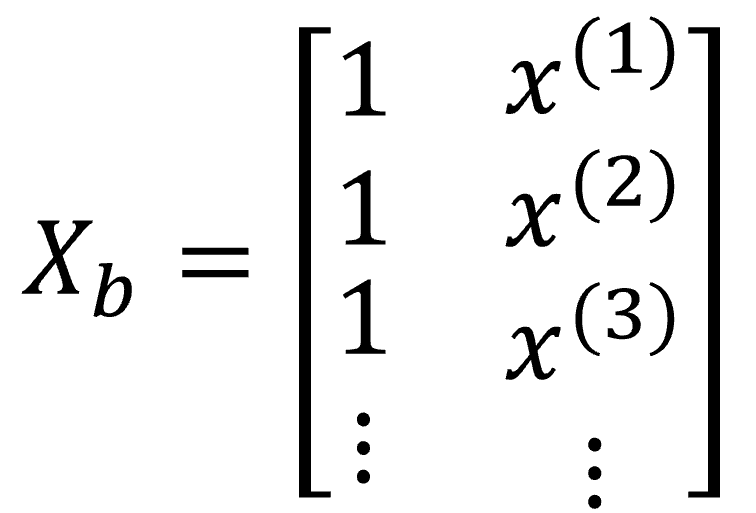

In [ ]:
x0 = np.ones((m,1))
Xb = np.c_[x0, X]

## 11. 준비

hyperparameter인 learning_rate (학습률)와 n_iter (반복 횟수)의 값을 지정해줘요.

In [ ]:
learning_rate = 0.0001
n_iter = 200

## 12. 초기화

사용할 변수인 theta와 gradients를 0으로 초기화해요. theta와 gradients는 그 크기가 (2x1) 행렬이에요.

In [ ]:
theta = np.zeros((2,1))
gradients = np.zeros((2,1))

## 12. 경사 하강법 수행

n_iter 동안 gradient와 theta를 계산해요.

In [ ]:
for i in range(n_iter):
  gradients = (1.0/m)*Xb.T.dot(Xb.dot(theta)-Y)

## 13. 결과 보기

최종 결과는 theta에요. 이 값을 찍어보아요. 그리고, theta를 이용해서 predicted value인 Y_pred를 계산하고, 이 Y_pred를 plot을 이용해서 그려보아요.

In [ ]:
theta = theta - learning_rate*gradients

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 100, penalty = None, alpha = 0.0001)
sgd_reg.fit(X , Y.ravel())

In [ ]:
Y_pred = sgd_reg.predict(X)
plt.plot(X, Y, '.b')
plt.plot(X, Y_pred, 'r')
plt.show()

In [ ]:
Xtest = np.array([1,20])
np.dot(Xtest, theta)

여기까지 끝.  수고 많았어요.